# WeatherPy
----


In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = os.path.join("..","output","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


617

###  API Calls



In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Get latitude and temperature for cities
cities = cities[0:len(cities)]

#set up lists to hold reponse info
#we need more data than latitude and temp for the hw 
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
lng = []
cities_list = []
country_code = []
counter = 0
set_list = 1
t = 10

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    counter += 1
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response["dt"])
        country_code.append(response['sys']['country'])
        cities_list.append(city)
        print(f'Processing Record {counter} of Set {set_list} | {city}')
    except KeyError:
        print("This city does not exist")
        pass
    
    if counter >= 50:
        time.sleep(t)
        counter = 0
        set_list += 1
        print(f'The program paused for {t} seconds')

Processing Record 1 of Set 1 | arraial do cabo
This city does not exist
Processing Record 3 of Set 1 | yingcheng
Processing Record 4 of Set 1 | katsuura
Processing Record 5 of Set 1 | bacolod
Processing Record 6 of Set 1 | taoudenni
Processing Record 7 of Set 1 | olafsvik
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | fougamou
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | camopi
Processing Record 14 of Set 1 | penticton
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | gondar
Processing Record 18 of Set 1 | sao joao da barra
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | port alfred
This city does not exist
Processing Record 25 of Set 

Processing Record 8 of Set 5 | raigarh
Processing Record 9 of Set 5 | marzuq
Processing Record 10 of Set 5 | pisco
Processing Record 11 of Set 5 | hervey bay
Processing Record 12 of Set 5 | auki
Processing Record 13 of Set 5 | yantal
Processing Record 14 of Set 5 | redlands
Processing Record 15 of Set 5 | berlevag
Processing Record 16 of Set 5 | dingle
Processing Record 17 of Set 5 | sesimbra
Processing Record 18 of Set 5 | panguipulli
Processing Record 19 of Set 5 | pangai
Processing Record 20 of Set 5 | port-gentil
Processing Record 21 of Set 5 | balsas
Processing Record 22 of Set 5 | saskylakh
This city does not exist
Processing Record 24 of Set 5 | rajapur
Processing Record 25 of Set 5 | saint george
Processing Record 26 of Set 5 | mahajanga
Processing Record 27 of Set 5 | antofagasta
Processing Record 28 of Set 5 | alofi
Processing Record 29 of Set 5 | aykhal
Processing Record 30 of Set 5 | ciempozuelos
Processing Record 31 of Set 5 | este
Processing Record 32 of Set 5 | provideni

Processing Record 13 of Set 9 | iqaluit
Processing Record 14 of Set 9 | haines junction
Processing Record 15 of Set 9 | lasa
Processing Record 16 of Set 9 | mantua
This city does not exist
Processing Record 18 of Set 9 | kumbo
Processing Record 19 of Set 9 | ajdabiya
Processing Record 20 of Set 9 | pedernales
Processing Record 21 of Set 9 | mathathane
Processing Record 22 of Set 9 | kupang
Processing Record 23 of Set 9 | normandin
Processing Record 24 of Set 9 | bonavista
Processing Record 25 of Set 9 | dicabisagan
Processing Record 26 of Set 9 | riyadh
Processing Record 27 of Set 9 | dogondoutchi
Processing Record 28 of Set 9 | nantucket
Processing Record 29 of Set 9 | mbaiki
This city does not exist
Processing Record 31 of Set 9 | natal
Processing Record 32 of Set 9 | henties bay
Processing Record 33 of Set 9 | calca
Processing Record 34 of Set 9 | borogontsy
Processing Record 35 of Set 9 | cockburn town
Processing Record 36 of Set 9 | vanimo
Processing Record 37 of Set 9 | alyangula

Processing Record 16 of Set 13 | shelburne
Processing Record 17 of Set 13 | barinas


In [5]:
print(len(cities_list), len(temp), len(humidity),len(cloudiness), len(lat), len(date), len(wind_speed),len(country_code))

563 563 563 563 563 563 563 563


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [276]:
import datetime
city_data = pd.DataFrame({"City ID":[x for x in range(len(cities_list))],"City Name":cities_list,"Country Code":country_code,"Date (UTC)":date,"Latitude":lat, "Longitude":lng,"Temperature (F)":temp,"Humidity (%)":humidity,"Cloudiness (%)":cloudiness,"Wind Speed (MPH)":wind_speed})
city_data["City Name"] = [city.title() for city in city_data["City Name"]]
city_data["Date (UTC)"] = [datetime.datetime.utcfromtimestamp(date) for date in city_data["Date (UTC)"]]
city_data = city_data.set_index('City ID')
city_data.to_csv(output_file)
city_data

,City Name,Country Code,Date (UTC),Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
City ID,,,,,,,,,
0,Arraial Do Cabo,BR,2020-05-12 02:26:24,-22.97,-42.03,71.96,79,0,22.41
1,Yingcheng,CN,2020-05-12 02:35:51,30.95,113.55,75.20,50,26,6.71
2,Katsuura,JP,2020-05-12 02:27:29,35.13,140.30,73.18,78,75,6.93
3,Bacolod,PH,2020-05-12 02:35:51,10.67,122.95,89.69,62,62,8.61
4,Taoudenni,ML,2020-05-12 02:26:42,22.68,-3.98,90.03,13,81,7.58
...,...,...,...,...,...,...,...,...,...
558,Princeton,US,2020-05-12 02:38:27,25.54,-80.41,76.35,73,1,13.87
559,Caravelas,BR,2020-05-12 02:35:40,-17.71,-39.25,71.42,75,0,3.89
560,Mirzapur,IN,2020-05-12 02:38:27,25.15,82.58,78.80,74,40,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

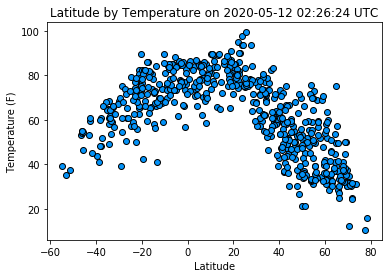

In [253]:
city_lat = city_data["Latitude"]
city_temp = city_data["Temperature (F)"]
city_date = city_data["Date (UTC)"]

plt.scatter(city_lat,city_temp,edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
sns.set_palette('terrain')
plt.title(f"Latitude by Temperature on {city_date[0]} UTC")
plt.savefig("../output/Lat_Temp_fig.png")

plt.show()

### Interpretation
The scatterplot above is visualizing the change in temperature based on latitude. The scatterplot depicts a 
maximum temperature around latitude 0, the equator. Temperature rises as latitude increases towards 0. Temperature 
decreases as latitude increases away from 0. 

#### Latitude vs. Humidity Plot

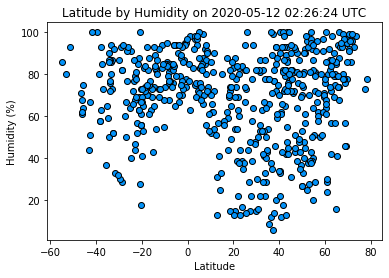

In [254]:
city_humidity = city_data["Humidity (%)"]

plt.scatter(city_lat,city_humidity,edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
sns.set_palette('terrain')
plt.title(f"Latitude by Humidity on {city_date[0]} UTC")
plt.savefig("../output/Lat_Hum_fig.png")
plt.show()

## Interpretation
The scatterplot above is visualzing the percent humidity in cities based on latitude. Qualitatively, the plot does
not seem to show a relationship. 

#### Latitude vs. Cloudiness Plot

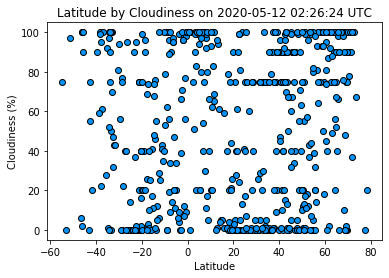

In [255]:
city_cloudiness = city_data["Cloudiness (%)"]

plt.scatter(city_lat,city_cloudiness,edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
sns.set_palette('terrain')
plt.title(f"Latitude by Cloudiness on {city_date[0]} UTC")
plt.savefig("../output/Lat_Cloud_fig.png")
plt.show()

## Interpretation
The scatterplot above is visualzing the percent cloudiness in cities based on latitude. Qualitatively, the plot does not seem to show a relationship. 

#### Latitude vs. Wind Speed Plot

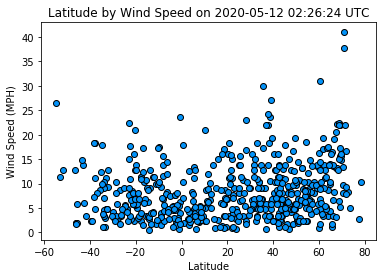

In [257]:
city_windspeed = city_data["Wind Speed (MPH)"]

plt.scatter(city_lat,city_windspeed,edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
sns.set_palette('terrain')
plt.title(f"Latitude by Wind Speed on {city_date[0]} UTC")
plt.savefig("../output/Lat_Wind_fig.png")
plt.show()

## Interpretation
The scatterplot above is visualzing the percent cloudiness in cities based on latitude. It looks as though, wind speed is clustered between ~10 MPH and 0 MPH regardless of latitude. 

## Linear Regression

In [258]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemp = city_data.loc[city_data["Latitude"]>=0,:]
Southern_hemp = city_data.loc[city_data["Latitude"]<0,:]

#Creating series for variables in the northern hemisphere
Northern_city_lat = Northern_hemp["Latitude"]
Northern_city_temp = Northern_hemp["Temperature (F)"]
Northern_city_hum = Northern_hemp["Humidity (%)"]
Northern_city_cloud = Northern_hemp["Cloudiness (%)"]
Northern_city_wind = Northern_hemp["Wind Speed (MPH)"]

#Creating series for variables in the southern hemisphere
Southern_city_lat = Southern_hemp["Latitude"]
Southern_city_temp = Southern_hemp["Temperature (F)"]
Southern_city_hum = Southern_hemp["Humidity (%)"]
Southern_city_cloud = Southern_hemp["Cloudiness (%)"]
Southern_city_wind = Southern_hemp["Wind Speed (MPH)"]


In [260]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearregression(x_values,y_values,x_label,y_label,x_annotate,y_annotate,x_annotate_r,y_annotate_r):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plot_r_value =(f'Corr Coef: {round(rvalue**2,2)}')
    plt.scatter(x_values,y_values,edgecolor='black')
    plt.plot(x_values,regress_values,"r-")
#     ax = plt.gca()
#     ax.set_facecolor('#38A1F3')
    sns.set_palette('terrain')
    plt.annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    plt.annotate(plot_r_value, (x_annotate_r,y_annotate_r),fontsize=15,color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(min(x_values)-2,max(x_values)+2)
    plt.ylim(min(y_values)-2,max(y_values)+2)
    if x_annotate >= 0:
        hemisphere_name = "Northern"
    else:
        hemisphere_name = "Southern"
    plt.title(f'{x_label} vs. {y_label} in the {hemisphere_name} Hemisphere')
    print(f"The r-squared is: {round(rvalue**2,2)}")
    print(line_eq)
    plt.savefig(f"../Output/{x_label}_{y_label}_{hemisphere_name}.jpg")
    plt.show()
    


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.67
y = -0.78x + 90.1


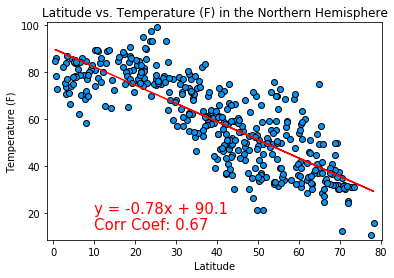

In [261]:
linearregression(Northern_city_lat,Northern_city_temp,"Latitude","Temperature (F)",10,20,10,13)

## Interpretation
This linear regression is quantitively describing the relationship between temperature and latitude in the 
northern hemisphere. The linear regression's Pearson's correlation coefficient of .85 represents a strong relationship between the variables. Because the slope of the regression line is ~(-1) we can say that as latitude increases (away from the equator), temperature decreases at a 1:1 relationship. Based on the y-intercept, the linear regression estimates that at the equator, temperature will be 90.77 degrees F. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46
y = 0.63x + 81.64


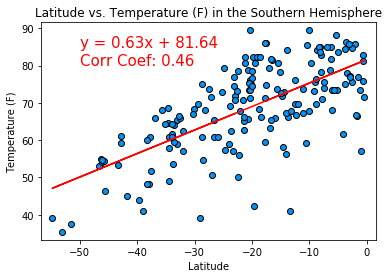

In [262]:
linearregression(Southern_city_lat,Southern_city_temp,"Latitude", "Temperature (F)",-50,85,-50,80)


## Interpretation
This linear regression is quantitively describing the relationship between temperature and latitude in the 
southern hemisphere. The linear regressions Pearson's correlation coefficient represents a moderate relationship (.53). Because the slope of the regression line is ~.5 we can say that as latitude increases (towards the equator), temperature increases at a 1:.5 relationship. That is, an increase in one latitude point will result in an increase of half of a degree in temperature fahrenheit. Based on the y-intercept, the linear regression estimates that at the equator, temperature will be 82.47 degrees F. It is interesting that the correlation coefficient of temperature vs latitude in the northern hemisphere was much stronger (.85) then the one displayed here. This is likely due to other variables affecting temperature in cities in the northern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01
y = 0.14x + 62.11


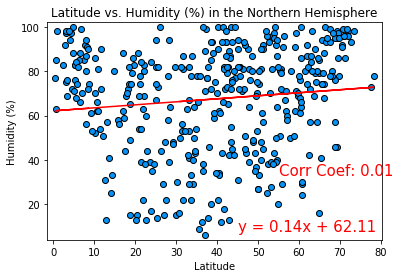

In [263]:
linearregression(Northern_city_lat,Northern_city_hum,"Latitude","Humidity (%)",45,8,55,33)

## Interpretation
This linear regression is quantitively describing the relationship between humidity and latitude in the 
northern hemisphere. Based on the r-squared value, we can qualify this relationship as very weak or does not exist. If the relationship does exist, as small as it may be,the slope of the linear regression model is positive; as latitude increases away from the equator, humidity increases. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06
y = 0.3x + 80.17


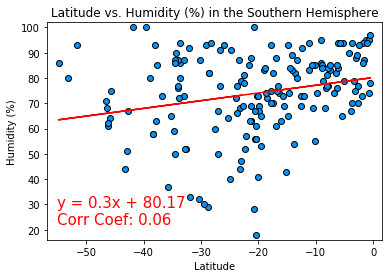

In [264]:
linearregression(Southern_city_lat,Southern_city_hum,"Latitude","Humidity (%)",-55,29,-55,22)

## Interpretation
This linear regression is quantitively describing the relationship between humidity and latitude in the 
southern hemisphere. Based on the r-squared value, we can qualify this relationship as very weak or does not exist. If the relationship does exist, as small as it may be, the slope of the linear regression model is positive; as latitude increases towards the equator, humidity increases. Based on this data, humidity does not seem to act in the same way across the equator like temperature behaves.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01
y = 0.23x + 44.73


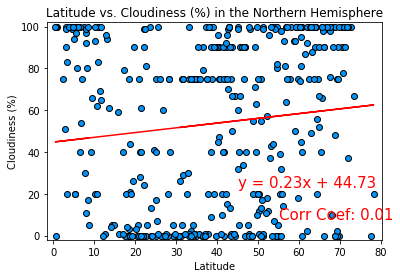

In [265]:
linearregression(Northern_city_lat,Northern_city_cloud,"Latitude","Cloudiness (%)",45,23,55,8)

## Interpretation
This linear regression is quantitively describing the relationship between cloudiness and latitude in the 
northern hemisphere. Based on the r-squared value, we can qualify this relationship as very weak or does not exist. If the relationship does exist, as small as it may be, the slope of the linear regression model is positive; as latitude increases away from the equator, cloudiness increases. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01
y = -0.21x + 40.38


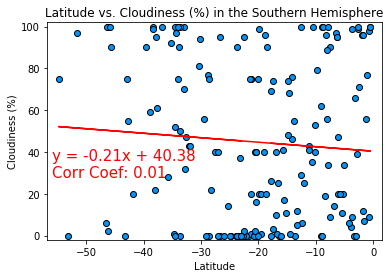

In [266]:
linearregression(Southern_city_lat,Southern_city_cloud,"Latitude","Cloudiness (%)",-56,36,-56,28)

## Interpretation
This linear regression is quantitively describing the relationship between cloudiness and latitude in the 
southern hemisphere. Based on the r-squared value, we can qualify this relationship as very weak or does not exist. If the relationship does exist, as small as it may be, the slope of the linear regression model is positive; as latitude increases away from 
the equator, cloudiness increases.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08
y = 0.08x + 5.36


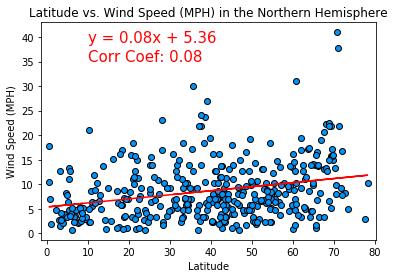

In [267]:
linearregression(Northern_city_lat,Northern_city_wind,"Latitude","Wind Speed (MPH)",10,39,10,35)

## Interpretation
This linear regression is quantitively describing the relationship between windspeed and latitude in the 
northern hemisphere. Based on the r-squared value, we can qualify this relationship as very weak or does not exist. If the relationship does exist, as small as it may be,it does appear that wind speed is clustering between ~10 MPH and 0 MPH which was previously described on the global scatter plot. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02
y = -0.05x + 6.15


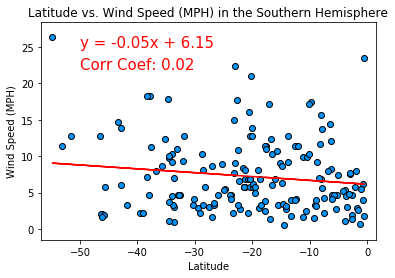

In [268]:
linearregression(Southern_city_lat,Southern_city_wind,"Latitude","Wind Speed (MPH)",-50,25,-50,22)

## Interpretation
This linear regression is quantitively describing the relationship between windspeed and latitude in the 
southern hemisphere. Based on the r-squared value, we can qualify this relationship as very weak or does not exist. If the relationship does exist, as small as it may be, the slope of the linear regression is negative, describing that as latitude increases, towards the equator, wind speed decreases. 
